In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt 
import seaborn as sns           
%matplotlib inline



In [2]:
ratings_df = pd.read_csv('C:\\Users\\User\\AppData\\Local\\Temp\\Rar$DIa0.183\\ratings_small.csv')
ratings_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\AppData\\Local\\Temp\\Rar$DIa0.183\\ratings_small.csv'

In [34]:
movies_df = pd.read_csv('C:\\Users\\User\\AppData\\Local\\Temp\\Rar$DIa0.900\\movies.csv')
movies_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\AppData\\Local\\Temp\\Rar$DIa0.900\\movies.csv'

In [35]:
movie_data = pd.merge(ratings_df, movies_df, on='movieId')

movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [36]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [37]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Eclisse, L' (Eclipse) (1962)                          5.0
North Shore (1987)                                    5.0
Six Shooter (2004)                                    5.0
Message to Love: The Isle of Wight Festival (1996)    5.0
Neighbouring Sounds (O som ao redor) (2012)           5.0
Name: rating, dtype: float64

In [38]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=True).head()

title
Peter & the Wolf (2006)                              0.5
Trespass (2011)                                      0.5
Behind the Mask: The Rise of Leslie Vernon (2006)    0.5
Paul Blart: Mall Cop (2009)                          0.5
Hip Hop Witch, Da (2000)                             0.5
Name: rating, dtype: float64

In [39]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [40]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


<AxesSubplot:>

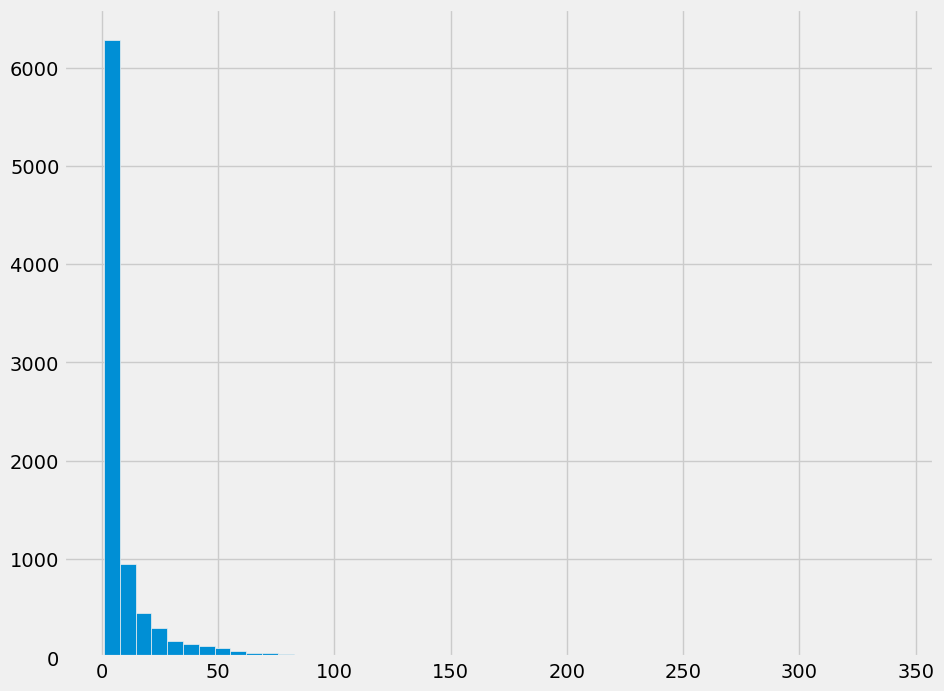

In [41]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

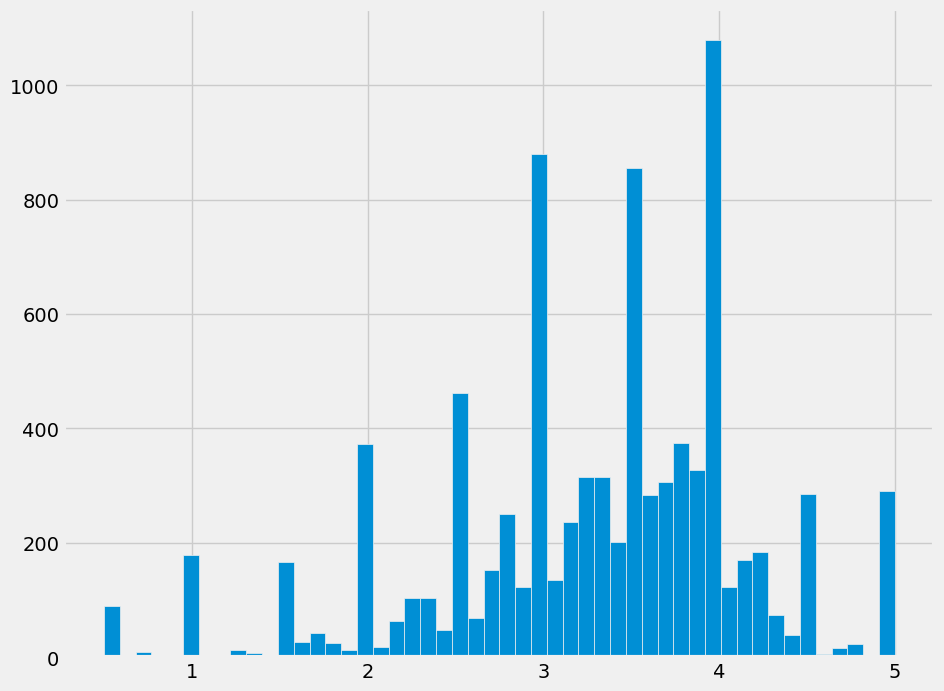

In [42]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 1000x800 with 0 Axes>

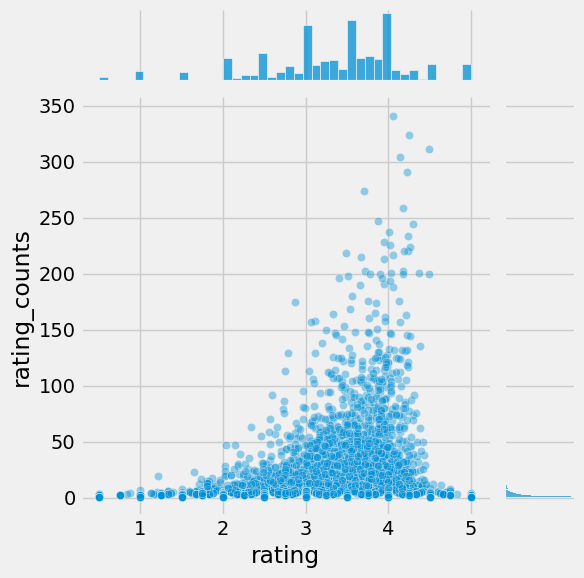

In [43]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [44]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head()

userId
1    NaN
2    3.0
3    5.0
4    5.0
5    4.0
Name: Forrest Gump (1994), dtype: float64

In [46]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [47]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
$9.99 (2008),1.0
"Matador, The (2005)",1.0
Song of the Little Road (Pather Panchali) (1955),1.0
Song of the Sea (2014),1.0
Song of the Thin Man (1947),1.0
Cria Cuervos (1976),1.0
"Cove, The (2009)",1.0
Control (2007),1.0
"Concert for George, The (2003)",1.0


In [48]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13


In [49]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65
